<a href="https://colab.research.google.com/github/rajkumar2004725/Leveraging-Graph-Representations-for-Efficient-Network-Anomaly-Detection-Using-GNNs/blob/main/anamoly_detection_using_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_0=pd.read_csv('/content/benign_dataset_100000.csv')
df_0.head()

Unnamed: 0                                   Flow ID         Src IP  \
0     1445871       172.31.0.2-172.31.66.76-53-55330-17   172.31.66.76   
1      283411   172.217.9.228-192.168.10.15-443-53799-6  192.168.10.15   
2     6626404  129.158.72.21-172.31.66.121-56889-3389-6  129.158.72.21   
3     6314547    172.31.65.117-23.218.55.94-51263-443-6  172.31.65.117   
4     7887478    172.31.67.95-94.25.169.113-445-35818-6  94.25.169.113   

   Src Port         Dst IP  Dst Port  Protocol               Timestamp  \
0     55330     172.31.0.2        53        17     20/02/2018 10:36:27   
1     53799  172.217.9.228       443         6  04/07/2017 12:15:36 AM   
2     56889  172.31.66.121      3389         6     20/02/2018 08:55:58   
3     51263   23.218.55.94       443         6     20/02/2018 11:53:46   
4     35818   172.31.67.95       445         6     20/02/2018 10:06:32   

   Flow Duration  Tot Fwd Pkts  ...  Fwd Seg Size Min    Active Mean  \
0          22123             2  ...                 8       0.000000   
1        3095495             4  ...                 0       0.000000   
2        1127340             8  ...                20       0.000000   
3      105120546            16  ...                20  137708.714286   
4        1088596             6  ...                20       0.000000   

     Active Std  Active Max  Active Min     Idle Mean      Idle Std  \
0      0.000000         0.0         0.0  0.000000e+00      0.000000   
1      0.000000         0.0         0.0  0.000000e+00      0.000000   
2      0.000000         0.0         0.0  0.000000e+00      0.000000   
3  11188.587008    158091.0    126951.0  1.486128e+07  31810.084689   
4      0.000000         0.0         0.0  0.000000e+00      0.000000   

     Idle Max    Idle Min   Label  
0         0.0         0.0  Benign  
1         0.0         0.0  Benign  
2         0.0         0.0  Benign  
3  14914967.0  14824695.0  Benign  
4         0.0         0.0  Benign  

[5 rows x 85 columns]

In [2]:
df_0.shape

(100000, 85)

In [3]:
df_0 = df_0.sample(3000)

In [4]:
df_1=pd.read_csv('/content/ddos_subset.csv')
df_1.head()

Unnamed: 0                               Flow ID         Src IP  Src Port  \
0         624  192.168.4.118-203.73.24.75-4504-80-6  192.168.4.118      4504   
1         625  192.168.4.118-203.73.24.75-4504-80-6  192.168.4.118      4504   
2         626  192.168.4.118-203.73.24.75-4505-80-6  192.168.4.118      4505   
3         627  192.168.4.118-203.73.24.75-4505-80-6  192.168.4.118      4505   
4         628  192.168.4.118-203.73.24.75-4506-80-6  192.168.4.118      4506   

         Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  203.73.24.75        80         6  12/06/2010 08:34:32 AM        3974862   
1  203.73.24.75        80         6  12/06/2010 08:34:36 AM             63   
2  203.73.24.75        80         6  12/06/2010 08:34:36 AM         476078   
3  203.73.24.75        80         6  12/06/2010 08:34:37 AM            151   
4  203.73.24.75        80         6  12/06/2010 08:34:37 AM         472507   

   Tot Fwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  Active Max  \
0            29  ...                 0          0.0         0.0         0.0   
1             1  ...                 0          0.0         0.0         0.0   
2             2  ...                 0          0.0         0.0         0.0   
3             2  ...                 0          0.0         0.0         0.0   
4             2  ...                 0          0.0         0.0         0.0   

   Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  
0         0.0        0.0       0.0       0.0       0.0   ddos  
1         0.0        0.0       0.0       0.0       0.0   ddos  
2         0.0        0.0       0.0       0.0       0.0   ddos  
3         0.0        0.0       0.0       0.0       0.0   ddos  
4         0.0        0.0       0.0       0.0       0.0   ddos  

[5 rows x 85 columns]

In [5]:
df_1.shape

(100000, 85)

In [6]:
df_1 = df_1.sample(3000)

In [7]:
df=pd.concat([df_0,df_1])
df.head()

Unnamed: 0                                    Flow ID           Src IP  \
49814     3712266        172.31.0.2-172.31.66.34-53-49365-17     172.31.66.34   
6817       645916    172.31.64.17-66.212.179.70-3389-51692-6    66.212.179.70   
71621     6901612     172.31.67.118-104.196.28.5-50281-443-6    172.31.67.118   
74950     4142841  162.242.237.105-172.31.66.74-53312-3389-6  162.242.237.105   
93368     5300082      172.31.68.15-65.52.108.11-50218-443-6     172.31.68.15   

       Src Port        Dst IP  Dst Port  Protocol            Timestamp  \
49814     49365    172.31.0.2        53        17  20/02/2018 09:53:26   
6817      51692  172.31.64.17      3389         6  20/02/2018 01:55:17   
71621     50281  104.196.28.5       443         6  20/02/2018 01:13:12   
74950     53312  172.31.66.74      3389         6  20/02/2018 01:13:16   
93368     50218  65.52.108.11       443         6  20/02/2018 09:10:04   

       Flow Duration  Tot Fwd Pkts  ...  Fwd Seg Size Min    Active Mean  \
49814            969             1  ...                 8       0.000000   
6817         3877263            10  ...                20       0.000000   
71621       10284763             9  ...                20  359684.000000   
74950        1106344             8  ...                20       0.000000   
93368       63013321            15  ...                20   79831.166667   

          Active Std  Active Max  Active Min   Idle Mean      Idle Std  \
49814       0.000000         0.0         0.0         0.0      0.000000   
6817        0.000000         0.0         0.0         0.0      0.000000   
71621       0.000000    359684.0    359684.0   9921724.0      0.000000   
74950       0.000000         0.0         0.0         0.0      0.000000   
93368  143381.343109    372507.0     21130.0  10093898.5  76361.203701   

         Idle Max   Idle Min   Label  
49814         0.0        0.0  Benign  
6817          0.0        0.0  Benign  
71621   9921724.0  9921724.0  Benign  
74950         0.0        0.0  Benign  
93368  10181537.0  9968461.0  Benign  

[5 rows x 85 columns]

In [8]:
df.shape

(6000, 85)

In [9]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()


Unnamed: 0                                  Flow ID         Src IP  \
0     2862983    172.31.65.27-13.89.184.96-49672-443-6   172.31.65.27   
1     3451393     172.31.0.2-172.31.66.119-53-53583-17  172.31.66.119   
2     1735751  169.254.169.254-172.31.67.54-80-49751-6   172.31.67.54   
3     4234527      172.31.0.2-172.31.66.80-53-59414-17   172.31.66.80   
4     2425712  169.254.169.254-172.31.64.69-80-52434-6   172.31.64.69   

   Src Port           Dst IP  Dst Port  Protocol            Timestamp  \
0     49672     13.89.184.96       443         6  20/02/2018 11:08:08   
1     53583       172.31.0.2        53        17  20/02/2018 03:02:00   
2     49751  169.254.169.254        80         6  20/02/2018 09:54:09   
3     59414       172.31.0.2        53        17  20/02/2018 10:51:35   
4     52434  169.254.169.254        80         6  20/02/2018 02:19:54   

   Flow Duration  Tot Fwd Pkts  ...  Fwd Seg Size Min  Active Mean  \
0       60092638             4  ...                20      77898.0   
1            652             1  ...                 8          0.0   
2            845             3  ...                20          0.0   
3          12367             1  ...                 8          0.0   
4            725             3  ...                20          0.0   

   Active Std  Active Max  Active Min   Idle Mean  Idle Std    Idle Max  \
0         0.0     77898.0     77898.0  59936879.0       0.0  59936879.0   
1         0.0         0.0         0.0         0.0       0.0         0.0   
2         0.0         0.0         0.0         0.0       0.0         0.0   
3         0.0         0.0         0.0         0.0       0.0         0.0   
4         0.0         0.0         0.0         0.0       0.0         0.0   

     Idle Min   Label  
0  59936879.0  Benign  
1         0.0  Benign  
2         0.0  Benign  
3         0.0  Benign  
4         0.0  Benign  

[5 rows x 85 columns]

In [10]:
df.drop(['Unnamed: 0','Flow ID'],axis=1,inplace=True)

In [11]:
df.head()

Src IP  Src Port           Dst IP  Dst Port  Protocol  \
0   172.31.65.27     49672     13.89.184.96       443         6   
1  172.31.66.119     53583       172.31.0.2        53        17   
2   172.31.67.54     49751  169.254.169.254        80         6   
3   172.31.66.80     59414       172.31.0.2        53        17   
4   172.31.64.69     52434  169.254.169.254        80         6   

             Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0  20/02/2018 11:08:08       60092638             4             2   
1  20/02/2018 03:02:00            652             1             1   
2  20/02/2018 09:54:09            845             3             4   
3  20/02/2018 10:51:35          12367             1             1   
4  20/02/2018 02:19:54            725             3             4   

   TotLen Fwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0            148.0  ...                20      77898.0         0.0   
1             40.0  ...                 8          0.0         0.0   
2            161.0  ...                20          0.0         0.0   
3             45.0  ...                 8          0.0         0.0   
4            148.0  ...                20          0.0         0.0   

   Active Max  Active Min   Idle Mean  Idle Std    Idle Max    Idle Min  \
0     77898.0     77898.0  59936879.0       0.0  59936879.0  59936879.0   
1         0.0         0.0         0.0       0.0         0.0         0.0   
2         0.0         0.0         0.0       0.0         0.0         0.0   
3         0.0         0.0         0.0       0.0         0.0         0.0   
4         0.0         0.0         0.0       0.0         0.0         0.0   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign  

[5 rows x 83 columns]

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
df['date'] = df['Timestamp'].dt.date
df['time'] = df['Timestamp'].dt.time
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['day'] = df['Timestamp'].dt.day
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year

In [13]:
df.head()

Src IP  Src Port           Dst IP  Dst Port  Protocol  \
0   172.31.65.27     49672     13.89.184.96       443         6   
1  172.31.66.119     53583       172.31.0.2        53        17   
2   172.31.67.54     49751  169.254.169.254        80         6   
3   172.31.66.80     59414       172.31.0.2        53        17   
4   172.31.64.69     52434  169.254.169.254        80         6   

            Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0 2018-02-20 11:08:08       60092638             4             2   
1 2018-02-20 03:02:00            652             1             1   
2 2018-02-20 09:54:09            845             3             4   
3 2018-02-20 10:51:35          12367             1             1   
4 2018-02-20 02:19:54            725             3             4   

   TotLen Fwd Pkts  ...    Idle Max    Idle Min   Label        date      time  \
0            148.0  ...  59936879.0  59936879.0  Benign  2018-02-20  11:08:08   
1             40.0  ...         0.0         0.0  Benign  2018-02-20  03:02:00   
2            161.0  ...         0.0         0.0  Benign  2018-02-20  09:54:09   
3             45.0  ...         0.0         0.0  Benign  2018-02-20  10:51:35   
4            148.0  ...         0.0         0.0  Benign  2018-02-20  02:19:54   

   hour  minute  day  month  year  
0    11       8   20      2  2018  
1     3       2   20      2  2018  
2     9      54   20      2  2018  
3    10      51   20      2  2018  
4     2      19   20      2  2018  

[5 rows x 90 columns]

In [14]:
import socket, struct
df['Src IP Encoded'] = df['Src IP'].apply(lambda ip: struct.unpack("!I", socket.inet_aton(ip))[0] / (2**32 - 1))
df['Dst IP Encoded'] = df['Dst IP'].apply(lambda ip: struct.unpack("!I", socket.inet_aton(ip))[0] / (2**32 - 1))


In [15]:
df.head()

Src IP  Src Port           Dst IP  Dst Port  Protocol  \
0   172.31.65.27     49672     13.89.184.96       443         6   
1  172.31.66.119     53583       172.31.0.2        53        17   
2   172.31.67.54     49751  169.254.169.254        80         6   
3   172.31.66.80     59414       172.31.0.2        53        17   
4   172.31.64.69     52434  169.254.169.254        80         6   

            Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0 2018-02-20 11:08:08       60092638             4             2   
1 2018-02-20 03:02:00            652             1             1   
2 2018-02-20 09:54:09            845             3             4   
3 2018-02-20 10:51:35          12367             1             1   
4 2018-02-20 02:19:54            725             3             4   

   TotLen Fwd Pkts  ...   Label        date      time  hour  minute  day  \
0            148.0  ...  Benign  2018-02-20  11:08:08    11       8   20   
1             40.0  ...  Benign  2018-02-20  03:02:00     3       2   20   
2            161.0  ...  Benign  2018-02-20  09:54:09     9      54   20   
3             45.0  ...  Benign  2018-02-20  10:51:35    10      51   20   
4            148.0  ...  Benign  2018-02-20  02:19:54     2      19   20   

   month  year  Src IP Encoded  Dst IP Encoded  
0      2  2018        0.672352        0.052150  
1      2  2018        0.672352        0.672348  
2      2  2018        0.672352        0.664042  
3      2  2018        0.672352        0.672348  
4      2  2018        0.672352        0.664042  

[5 rows x 92 columns]

In [16]:
features_to_drop = [
    "CWE Flag Count",
    "ECE Flag Cnt",
    "Fwd IAT Std",
    "Bwd IAT Std",
    "Fwd URG Flags",
    "Bwd URG Flags",
    "Active Std",
    "Idle Std",
    "Idle Min",
    "Fwd Byts/b Avg",
    "Fwd Pkts/b Avg",
    "Fwd Blk Rate Avg",
    "Bwd Byts/b Avg",
    "Bwd Pkts/b Avg",
    "Bwd Blk Rate Avg",
    "Subflow Fwd Pkts",
    "Subflow Fwd Byts",
    "Subflow Bwd Pkts",
    "Subflow Bwd Byts",
    "Init Fwd Win Byts",
    "Init Bwd Win Byts",
    "PSH Flag Cnt",
    "Timestamp",
    "date",
    "time"
]
df.drop(features_to_drop, axis=1, inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Src IP             6000 non-null   object 
 1   Src Port           6000 non-null   int64  
 2   Dst IP             6000 non-null   object 
 3   Dst Port           6000 non-null   int64  
 4   Protocol           6000 non-null   int64  
 5   Flow Duration      6000 non-null   int64  
 6   Tot Fwd Pkts       6000 non-null   int64  
 7   Tot Bwd Pkts       6000 non-null   int64  
 8   TotLen Fwd Pkts    6000 non-null   float64
 9   TotLen Bwd Pkts    6000 non-null   float64
 10  Fwd Pkt Len Max    6000 non-null   float64
 11  Fwd Pkt Len Min    6000 non-null   float64
 12  Fwd Pkt Len Mean   6000 non-null   float64
 13  Fwd Pkt Len Std    6000 non-null   float64
 14  Bwd Pkt Len Max    6000 non-null   float64
 15  Bwd Pkt Len Min    6000 non-null   float64
 16  Bwd Pkt Len Mean   6000 

In [18]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'ddos' else 0)

In [19]:
df.drop(['Src IP','Dst IP'],axis=1,inplace=True)

In [20]:
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('Label')))
df = df.loc[:, cols]


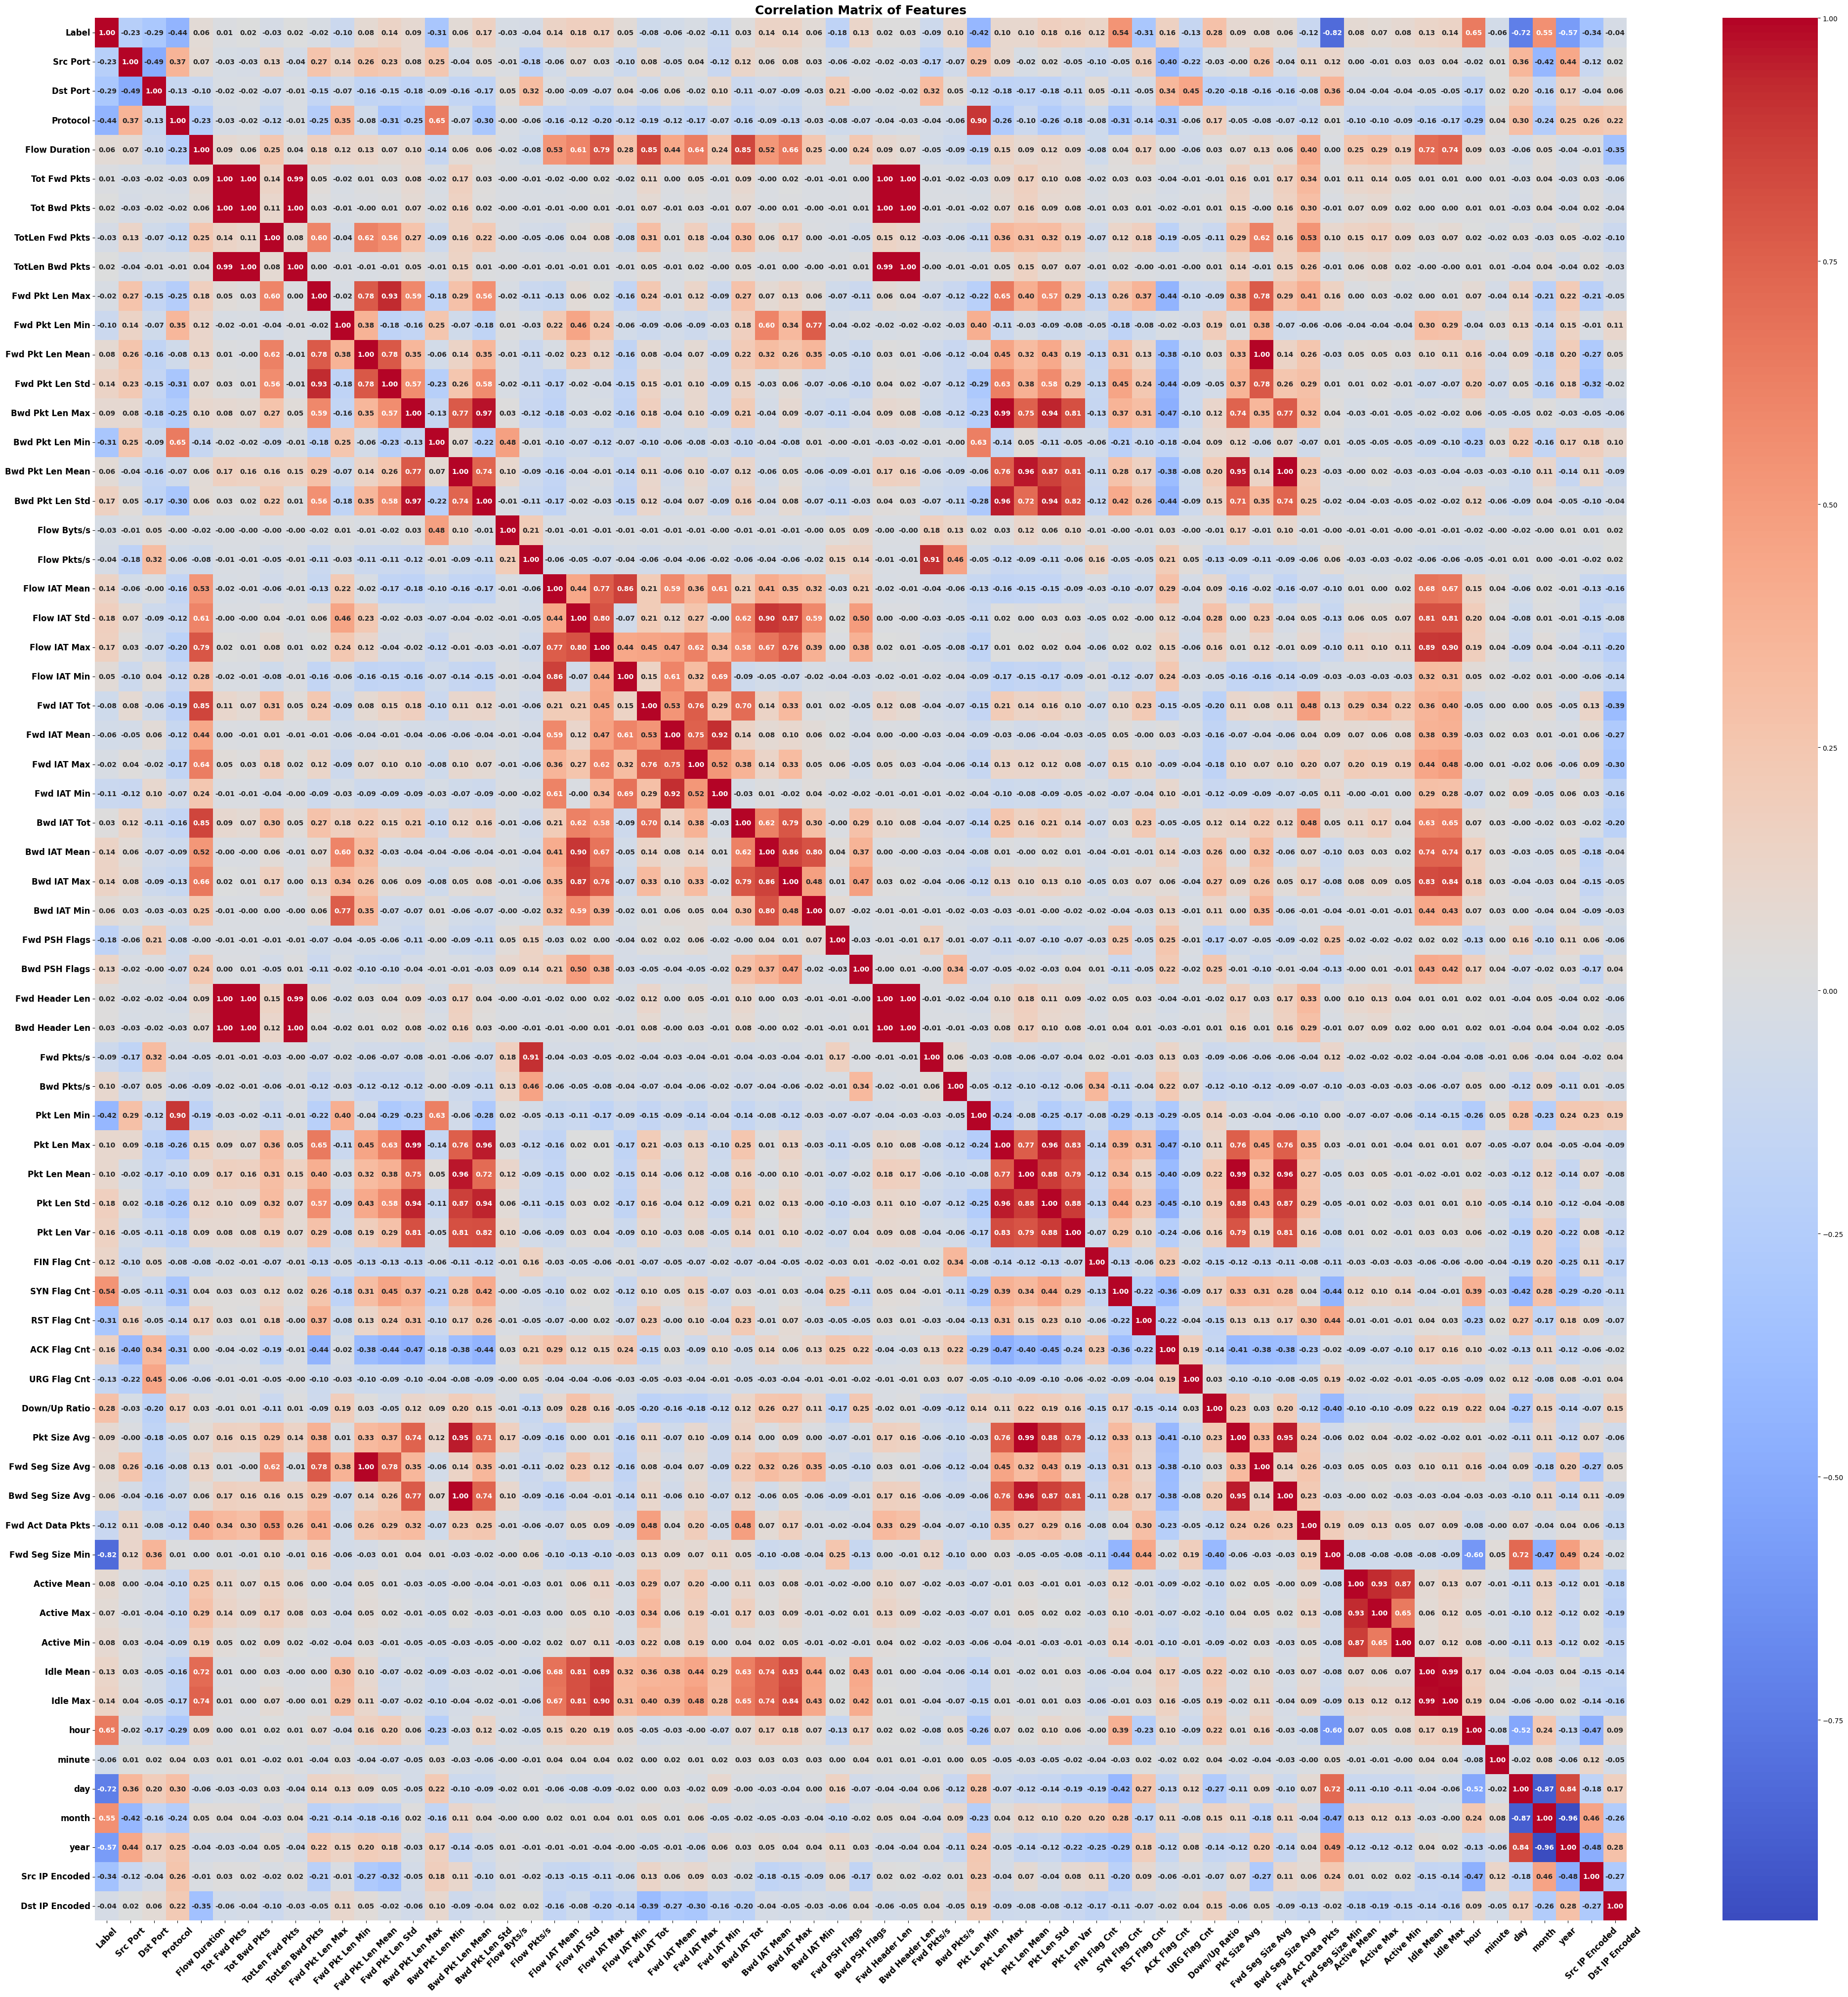

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(50, 50))  # Adjust figure size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"fontweight": "bold"}  # Make annotation text bold
)

# Set bold title
plt.title('Correlation Matrix of Features', fontsize=18, fontweight='bold')

# Set bold feature names for both axes
plt.yticks(fontsize=12, fontweight='bold', rotation=0)  # Bold y-axis labels
plt.xticks(fontsize=12, fontweight='bold', rotation=45)  # Bold x-axis labels

plt.show()


In [22]:
df.isnull().sum()

Label             0
Src Port          0
Dst Port          0
Protocol          0
Flow Duration     0
                 ..
day               0
month             0
year              0
Src IP Encoded    0
Dst IP Encoded    0
Length: 65, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Label              6000 non-null   int64  
 1   Src Port           6000 non-null   int64  
 2   Dst Port           6000 non-null   int64  
 3   Protocol           6000 non-null   int64  
 4   Flow Duration      6000 non-null   int64  
 5   Tot Fwd Pkts       6000 non-null   int64  
 6   Tot Bwd Pkts       6000 non-null   int64  
 7   TotLen Fwd Pkts    6000 non-null   float64
 8   TotLen Bwd Pkts    6000 non-null   float64
 9   Fwd Pkt Len Max    6000 non-null   float64
 10  Fwd Pkt Len Min    6000 non-null   float64
 11  Fwd Pkt Len Mean   6000 non-null   float64
 12  Fwd Pkt Len Std    6000 non-null   float64
 13  Bwd Pkt Len Max    6000 non-null   float64
 14  Bwd Pkt Len Min    6000 non-null   float64
 15  Bwd Pkt Len Mean   6000 non-null   float64
 16  Bwd Pkt Len Std    6000 

In [24]:
qwer=['Label','Src Port','Dst Port','Protocol','Bwd Pkt Len Min','Pkt Len Min','SYN Flag Cnt','RST Flag Cnt','Down/Up Ratio','Fwd Seg Size Min','hour','day','month','year','Src IP Encoded','Flow IAT Std','Pkt Len Std','Bwd Pkt Len Std','Flow IAT Max']

In [25]:
qwer

['Label',
 'Src Port',
 'Dst Port',
 'Protocol',
 'Bwd Pkt Len Min',
 'Pkt Len Min',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'Down/Up Ratio',
 'Fwd Seg Size Min',
 'hour',
 'day',
 'month',
 'year',
 'Src IP Encoded',
 'Flow IAT Std',
 'Pkt Len Std',
 'Bwd Pkt Len Std',
 'Flow IAT Max']

In [26]:
df=df[qwer]

In [27]:
df.shape

(6000, 19)

In [28]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [29]:
df.shape

(6000, 19)

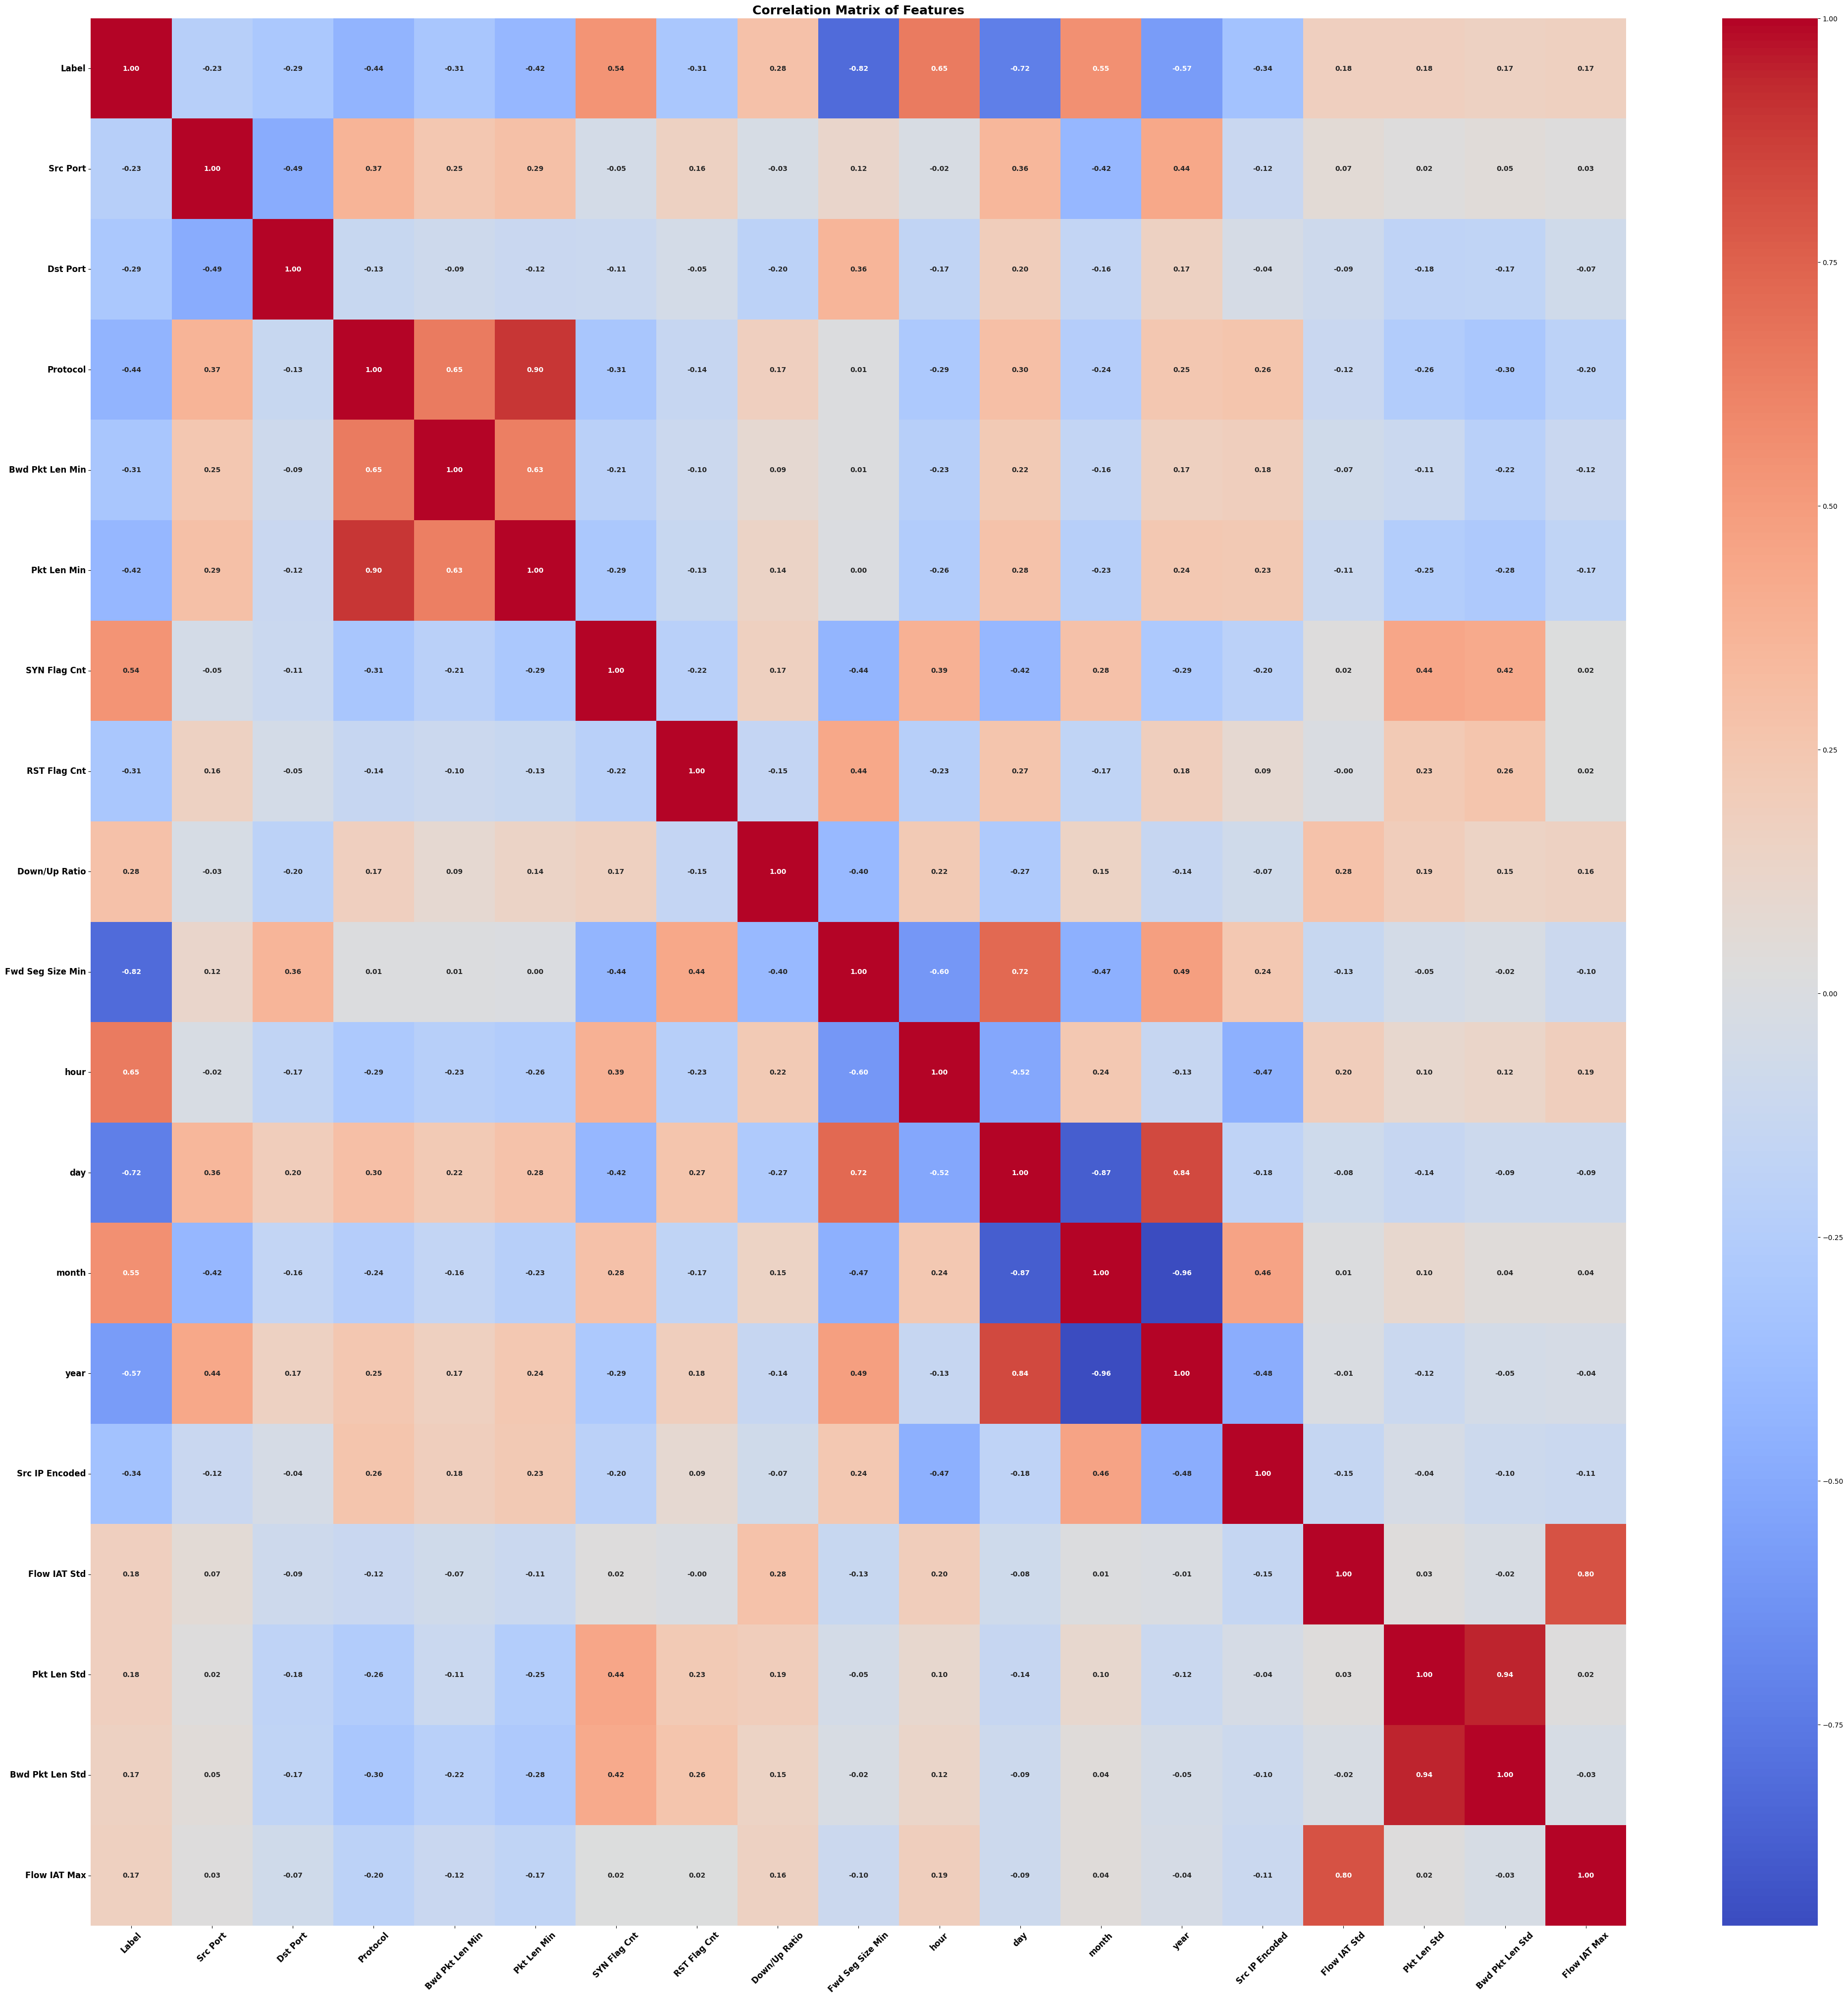

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(50, 50))  # Adjust figure size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"fontweight": "bold"}  # Make annotation text bold
)

# Set bold title
plt.title('Correlation Matrix of Features', fontsize=18, fontweight='bold')

# Set bold feature names for both axes
plt.yticks(fontsize=12, fontweight='bold', rotation=0)  # Bold y-axis labels
plt.xticks(fontsize=12, fontweight='bold', rotation=45)  # Bold x-axis labels

plt.show()


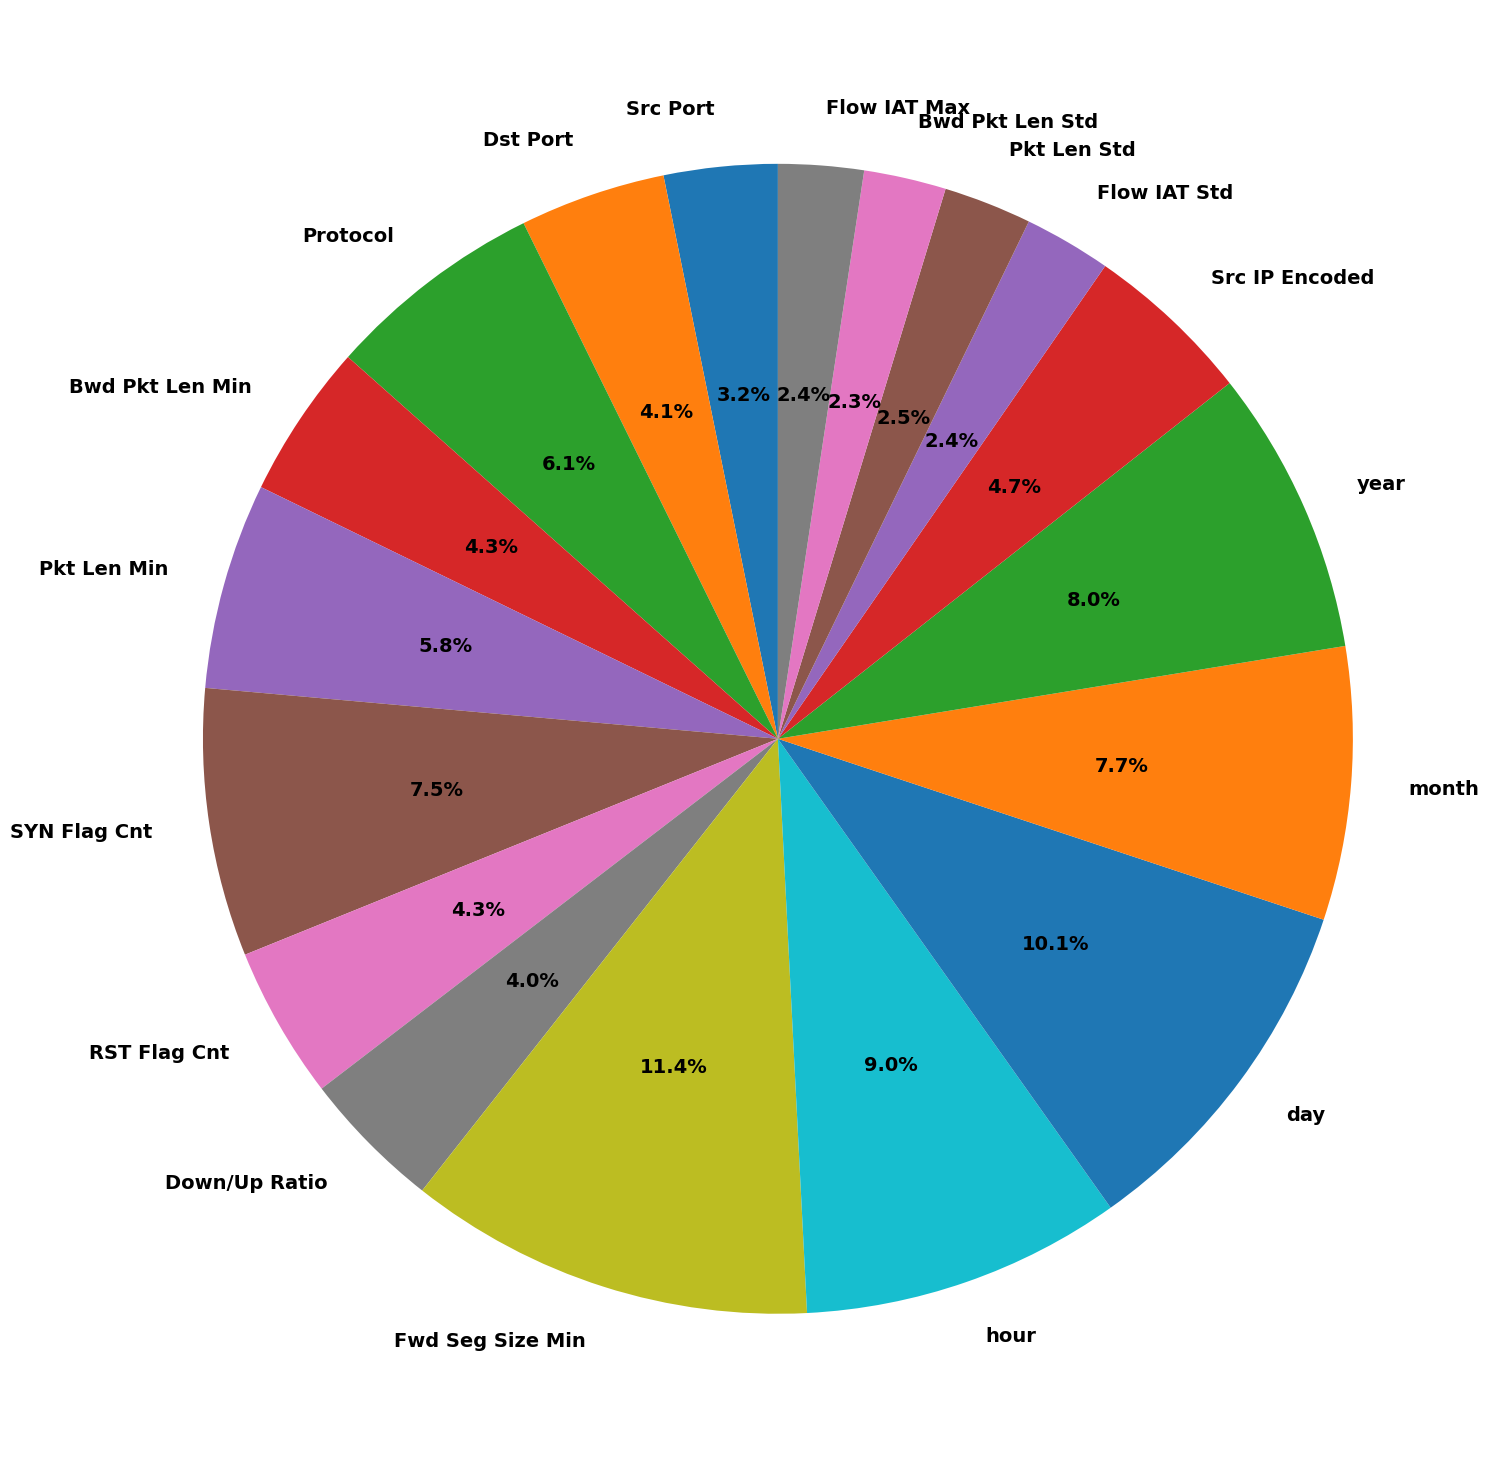

In [31]:
import matplotlib.pyplot as plt



# Extract correlations with the 'Label' column
label_correlations = correlation_matrix['Label'].drop('Label')

# Create the pie chart
plt.figure(figsize=(15, 15))  # Adjust figure size
plt.pie(
    label_correlations.abs(),
    labels=label_correlations.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 14, 'fontweight': 'bold'}  # Increase font size for labels and percentages
)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Improve label visibility
plt.tight_layout()

plt.show()


In [32]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.5 MB/s eta 0:00:00


In [33]:
import torch
from torch_geometric.data import Data
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN



# Step 1: Separate features and labels
features = df.drop(columns=['Label']).values  # Node features (shape: [3000, 18])
labels = df['Label'].values  # Node labels (shape: [3000])

In [34]:
features.shape

(6000, 18)

In [35]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


In [36]:
# Step 2: Infer known relationships using clustering
def infer_known_relationships(features, eps=0.5, min_samples=5):
    """
    Infer known relationships using clustering (e.g., DBSCAN).
    Nodes in the same cluster are connected.
    """
    clustering = DBSCAN(eps=0.2, min_samples=3).fit(normalized_features)
    clusters = clustering.labels_

    known_edges = []
    for cluster_id in set(clusters):
        if cluster_id == -1:  # Skip noise points
            continue
        nodes_in_cluster = (clusters == cluster_id).nonzero()[0]
        for i in nodes_in_cluster:
            for j in nodes_in_cluster:
                if i != j:
                    known_edges.append((i, j))
    return known_edges


known_relationships = infer_known_relationships(normalized_features, eps=0.2, min_samples=3)





In [37]:
# Number of clusters found (excluding noise)
num_clusters = len(set(known_relationships)) - (1 if -1 in known_relationships else 0)
print(f"Number of clusters found: {num_clusters}")

# Number of noise points
noise_count = sum(1 for label in known_relationships if label == -1)
print(f"Number of noise points: {noise_count}")


Number of clusters found: 602476
Number of noise points: 0


In [38]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your original data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# DBSCAN clustering
clustering = DBSCAN(eps=0.2, min_samples=3).fit(normalized_features)
labels_array = clustering.labels_  # Get cluster labels for each data point


In [39]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import numpy as np



# Reduce dimensionality using PCA (keep 3 components for 3D visualization)
pca = PCA(n_components=3)
features_3d = pca.fit_transform(normalized_features)

# Create a list of unique labels for the legend
unique_labels = np.unique(labels_array)

# Create traces for each cluster label to display legend and hover information
traces = []
for label in unique_labels:
    cluster_points = features_3d[labels_array == label]
    traces.append(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        name=f'Cluster {label}',  # Legend entry for the cluster
        marker=dict(
            size=5,
            opacity=0.8
        ),
        text=[f'Cluster: {label}' for _ in range(cluster_points.shape[0])],  # Hover text
        hoverinfo='text'  # Show hover text only
    ))

# Combine all traces into a single figure
fig = go.Figure(data=traces)

fig.update_layout(
    title="3D PCA Visualization of Clusters",
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3"
    ),
    legend=dict(title="Clusters")  # Add a legend title
)

fig.show()


In [40]:
# Reduce dimensionality using PCA (keep 3 components for 3D visualization)
pca = PCA(n_components=3)
features_3d = pca.fit_transform(normalized_features)

# Create 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=features_3d[:, 0],
    y=features_3d[:, 1],
    z=features_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_array,  # Color points by cluster labels
        colorscale='prgn',  # Choose a colorscale
        opacity=0.8
    )
)])

fig.update_layout(
    title="3D PCA Visualization of Clusters",
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3"
    )
)
fig.show()

In [41]:


import plotly.express as px

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(normalized_features)

# Create a DataFrame for Plotly
df_plotly = pd.DataFrame({'PC1': features_2d[:, 0],
                         'PC2': features_2d[:, 1],
                         'Cluster': labels_array})

# Create the Plotly scatter plot
fig = px.scatter(df_plotly, x='PC1', y='PC2', color='Cluster',
                 title="PCA Visualization of Clusters (Plotly)",
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'})
fig.show()

In [42]:
# Step 3: Create similarity-based edges and weights
def create_similarity_edges(features, threshold=0.3, known_edges=None):
    """
    Create edges and weights based on cosine similarity and known relationships.
    """
    features_tensor = torch.tensor(features, dtype=torch.float)
    similarity_matrix = cosine_similarity(features)  # Compute similarity

    edge_index = []
    edge_weight = []

    # Add similarity-based edges
    for i in range(similarity_matrix.shape[0]):
        for j in range(similarity_matrix.shape[1]):
            if i != j and similarity_matrix[i, j] > threshold:
                edge_index.append((i, j))
                edge_weight.append(similarity_matrix[i, j])

    # Add known relationships as high-weight edges
    if known_edges:
        for i, j in known_edges:
            edge_index.append((i, j))
            edge_weight.append(1.0)  # High weight for known relationships

    # Convert to tensors
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)

    return edge_index, edge_weight

edge_index, edge_weight = create_similarity_edges(normalized_features, threshold=0.3, known_edges=known_relationships)


In [43]:
# Step 4: Create graph data
num_nodes = len(df)
graph_data = Data(
    x=torch.tensor(normalized_features, dtype=torch.float),  # Node features
    edge_index=edge_index,  # Edge list
    edge_attr=edge_weight,  # Edge weights
    y=torch.tensor(labels, dtype=torch.long),  # Node labels
)

# Output the graph
print(graph_data)


Data(x=[6000, 18], edge_index=[2, 7902862], edge_attr=[7902862], y=[6000])


In [44]:
from torch_geometric.utils import train_test_split_edges

# Step 1: Define the split ratios
train_ratio = 0.75
val_ratio = 0.20
test_ratio = 0.05

# Step 2: Randomly split nodes into training, validation, and testing
num_nodes = graph_data.num_nodes
indices = torch.randperm(num_nodes)  # Shuffle node indices

# Compute split sizes
train_size = int(train_ratio * num_nodes)
val_size = int(val_ratio * num_nodes)

train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

# Step 3: Create masks for training, validation, and testing
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[train_indices] = True
val_mask[val_indices] = True
test_mask[test_indices] = True

# Step 4: Update graph data with masks
graph_data.train_mask = train_mask
graph_data.val_mask = val_mask
graph_data.test_mask = test_mask

# Output the graph data with masks
print(graph_data)


Data(x=[6000, 18], edge_index=[2, 7902862], edge_attr=[7902862], y=[6000], train_mask=[6000], val_mask=[6000], test_mask=[6000])


In [45]:


train_labels = graph_data.y[graph_data.train_mask]  # Labels for the training nodes
val_labels = graph_data.y[graph_data.val_mask]      # Labels for the validation nodes
test_labels = graph_data.y[graph_data.test_mask]    # Labels for the test nodes

# Output the labels
print("Train Labels:", train_labels)
print("Validation Labels:", val_labels)
print("Test Labels:", test_labels)


print("Train Labels:", train_labels.shape)
print("Validation Labels:", val_labels.shape)
print("Test Labels:", test_labels.shape)

Train Labels: tensor([0, 0, 0,  ..., 1, 0, 1])
Validation Labels: tensor([0, 0, 1,  ..., 1, 0, 1])
Test Labels: tensor([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        

In [105]:
# Define the GCN Model for node classification
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn as nn

class GCN_NodeClassification(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN_NodeClassification, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x





# Training and Evaluation Functions
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def evaluate(model, data, criterion):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        loss = criterion(out[data.val_mask], data.y[data.val_mask])
    return loss

# Training loop with early stopping
def train_gcn_with_early_stopping(data, model, optimizer, criterion, num_epochs=50, patience=10):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(num_epochs):
        # Training step
        train_loss = train(model, data, optimizer, criterion)
        train_losses.append(train_loss.item())

        # Validation step
        val_loss = evaluate(model, data, criterion)
        val_losses.append(val_loss.item())

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss.item():.4f}, '
              f'Validation Loss: {val_loss.item():.4f}')

        # Early stopping logic
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            early_stop_counter = 0
            best_model_state = model.state_dict()  # Save the best model
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model state
    model.load_state_dict(best_model_state)
    return train_losses, val_losses

In [100]:
# Model initialization and setup
in_channels = graph_data.x.shape[1]
hidden_channels = 64
out_channels = 2  # Binary classification (0: normal, 1: anomaly)
learning_rate = 0.001
num_epochs = 250
model = GCN_NodeClassification(in_channels, hidden_channels, out_channels)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()


Epoch [1/250], Train Loss: 0.5723, Validation Loss: 0.5423
Epoch [2/250], Train Loss: 0.5463, Validation Loss: 0.5182
Epoch [3/250], Train Loss: 0.5214, Validation Loss: 0.4951
Epoch [4/250], Train Loss: 0.4974, Validation Loss: 0.4729
Epoch [5/250], Train Loss: 0.4746, Validation Loss: 0.4518
Epoch [6/250], Train Loss: 0.4528, Validation Loss: 0.4317
Epoch [7/250], Train Loss: 0.4322, Validation Loss: 0.4127
Epoch [8/250], Train Loss: 0.4127, Validation Loss: 0.3947
Epoch [9/250], Train Loss: 0.3943, Validation Loss: 0.3777
Epoch [10/250], Train Loss: 0.3769, Validation Loss: 0.3616
Epoch [11/250], Train Loss: 0.3605, Validation Loss: 0.3464
Epoch [12/250], Train Loss: 0.3450, Validation Loss: 0.3320
Epoch [13/250], Train Loss: 0.3304, Validation Loss: 0.3183
Epoch [14/250], Train Loss: 0.3167, Validation Loss: 0.3055
Epoch [15/250], Train Loss: 0.3037, Validation Loss: 0.2933
Epoch [16/250], Train Loss: 0.2915, Validation Loss: 0.2818
Epoch [17/250], Train Loss: 0.2800, Validation Lo

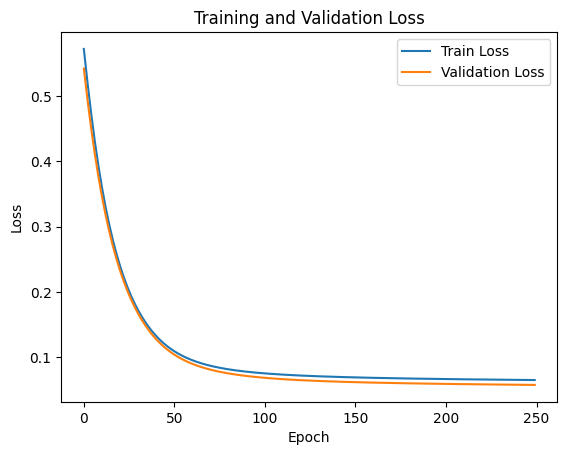

In [101]:
# Train the model
train_losses, val_losses = train_gcn_with_early_stopping(graph_data, model, optimizer, criterion, num_epochs, patience=10)

# Plot Losses
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()




In [106]:

import torch



# Get model predictions
model.eval()
with torch.no_grad():
    predictions = model(graph_data.x, graph_data.edge_index)
    _, predicted_labels = torch.max(predictions, dim=1)

# Calculate accuracy
accuracy = (predicted_labels[graph_data.test_mask] == graph_data.y[graph_data.test_mask]).sum().item() / graph_data.test_mask.sum().item()
print(f"Accuracy: {accuracy * 100:.2f}%")


# Count anomalies
anomaly_count = (predicted_labels == 1).sum().item()
print(f"Number of anomalies detected: {anomaly_count}")

# Get the indices of detected anomalies
anomaly_indices = torch.where(predicted_labels == 1)[0].tolist()
print(f"Indices of detected anomalies: {anomaly_indices}")

Accuracy: 99.00%
Number of anomalies detected: 3088
Indices of detected anomalies: [0, 3, 4, 6, 7, 8, 14, 16, 20, 22, 23, 28, 29, 30, 33, 34, 38, 40, 42, 43, 44, 47, 49, 50, 52, 53, 55, 57, 59, 62, 67, 68, 70, 75, 76, 77, 78, 85, 86, 87, 88, 90, 91, 94, 96, 100, 101, 102, 104, 105, 106, 108, 111, 114, 115, 117, 119, 120, 121, 124, 125, 126, 127, 136, 139, 141, 143, 144, 145, 149, 153, 154, 155, 159, 163, 164, 165, 168, 169, 170, 172, 175, 176, 178, 185, 187, 190, 193, 195, 196, 197, 198, 199, 200, 203, 204, 205, 207, 208, 209, 215, 216, 217, 218, 219, 226, 227, 231, 234, 236, 237, 238, 240, 241, 242, 243, 245, 247, 248, 253, 256, 260, 261, 263, 267, 270, 271, 273, 274, 275, 276, 277, 278, 282, 283, 285, 286, 287, 288, 289, 290, 292, 293, 295, 296, 297, 298, 301, 302, 303, 304, 306, 307, 308, 310, 311, 313, 314, 316, 317, 319, 320, 321, 323, 324, 326, 327, 329, 330, 335, 337, 339, 342, 345, 346, 348, 349, 350, 352, 356, 358, 359, 360, 361, 363, 364, 367, 373, 375, 376, 377, 378, 380, 38

In [107]:



# Get model predictions
model.eval()
with torch.no_grad():
    predictions = model(graph_data.x, graph_data.edge_index)
    _, predicted_labels = torch.max(predictions, dim=1)

# Calculate accuracy on the test data
correct_predictions = (predicted_labels[graph_data.test_mask] == graph_data.y[graph_data.test_mask]).sum().item()
total_test_samples = graph_data.test_mask.sum().item()
test_accuracy = correct_predictions / total_test_samples
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Count anomalies in the test data
anomaly_count_test = (predicted_labels[graph_data.test_mask] == 1).sum().item()
print(f"Number of anomalies detected in test data: {anomaly_count_test}")

# Get the indices of detected anomalies in the test data
anomaly_indices_test = torch.where(predicted_labels[graph_data.test_mask] == 1)[0].tolist()
print(f"Indices of anomalies detected in test data: {anomaly_indices_test}")

Test Accuracy: 99.00%
Number of anomalies detected in test data: 148
Indices of anomalies detected in test data: [0, 3, 6, 9, 10, 12, 14, 16, 17, 19, 28, 31, 32, 33, 39, 40, 41, 45, 46, 47, 48, 54, 55, 57, 59, 64, 66, 68, 69, 70, 72, 74, 75, 76, 77, 79, 80, 81, 87, 88, 89, 90, 92, 93, 95, 96, 98, 105, 106, 107, 108, 111, 112, 114, 115, 119, 126, 129, 130, 131, 133, 134, 135, 137, 139, 141, 142, 146, 148, 151, 152, 153, 154, 155, 157, 159, 161, 165, 167, 168, 174, 179, 181, 182, 183, 184, 185, 187, 188, 190, 193, 194, 195, 196, 197, 198, 199, 201, 205, 208, 209, 210, 212, 213, 214, 215, 216, 219, 220, 221, 222, 225, 227, 228, 231, 232, 235, 237, 238, 239, 244, 248, 249, 250, 251, 252, 256, 259, 260, 261, 263, 266, 267, 268, 269, 271, 275, 276, 277, 279, 280, 282, 283, 284, 285, 289, 295, 296]


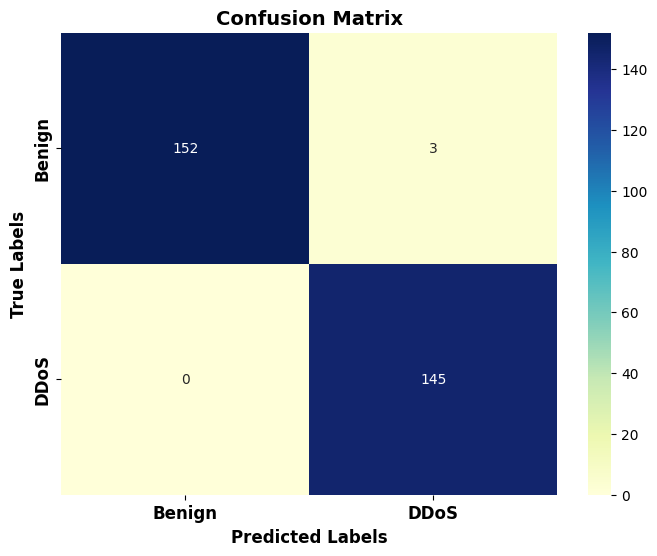

In [122]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Create the confusion matrix
cm = confusion_matrix(graph_data.y[graph_data.test_mask], predicted_labels[graph_data.test_mask])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Benign', 'DDoS'],  # Replace with your class labels
            yticklabels=['Benign', 'DDoS'])  # Replace with your class labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Set bold title and axis labels
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Labels", fontsize=12, fontweight="bold")
plt.ylabel("True Labels", fontsize=12, fontweight="bold")

# Set bold tick labels
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.show()

In [115]:
# prompt: print classification report in table form

from sklearn.metrics import classification_report

# Assuming 'graph_data' and 'model' are defined from the previous code
# and 'test_predicted_labels' contains the predictions on the test set

model.eval()
with torch.no_grad():
    test_predictions = model(graph_data.x, graph_data.edge_index)[graph_data.test_mask]
    test_predicted_labels = test_predictions.argmax(dim=1)

# Generate the classification report
report = classification_report(graph_data.y[graph_data.test_mask], test_predicted_labels, output_dict=True)

# Convert the classification report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the DataFrame as a formatted table
print(report_df.to_string(formatters={  # Use formatters to control column formatting
    'precision': '{:.2%}'.format,      # Format precision as percentage
    'recall': '{:.2%}'.format,        # Format recall as percentage
    'f1-score': '{:.2%}'.format,     # Format F1-score as percentage
    'support': '{:.0f}'.format        # Format support as integer
}))

             precision  recall f1-score support
0              100.00%  98.06%   99.02%     155
1               97.97% 100.00%   98.98%     145
accuracy        99.00%  99.00%   99.00%       1
macro avg       98.99%  99.03%   99.00%     300
weighted avg    99.02%  99.00%   99.00%     300


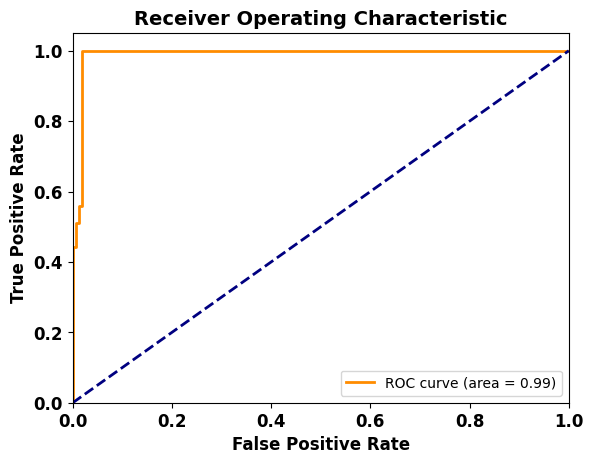

In [121]:
# prompt: roc curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'model' and 'graph_data' are defined from the previous code

# Get model predictions for the test set
model.eval()
with torch.no_grad():
    test_predictions = model(graph_data.x, graph_data.edge_index)[graph_data.test_mask]
    # Get probabilities for the positive class (class 1, assuming binary classification)
    test_probabilities = torch.softmax(test_predictions, dim=1)[:, 1]


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(graph_data.y[graph_data.test_mask], test_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=12, fontweight="bold")
plt.ylabel('True Positive Rate',fontsize=12, fontweight="bold")
plt.title('Receiver Operating Characteristic',fontsize=14, fontweight="bold")
plt.legend(loc="lower right")
# Set bold tick labels
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.show()

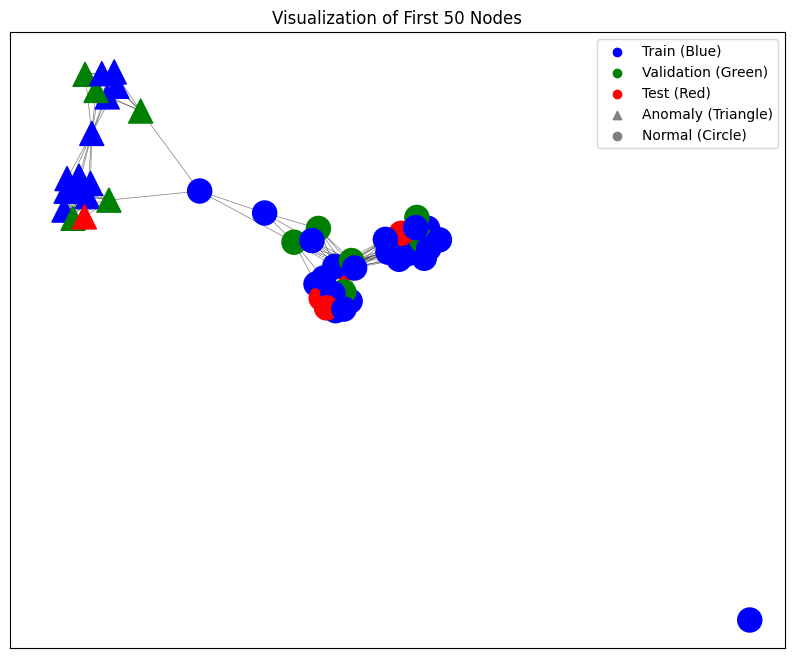

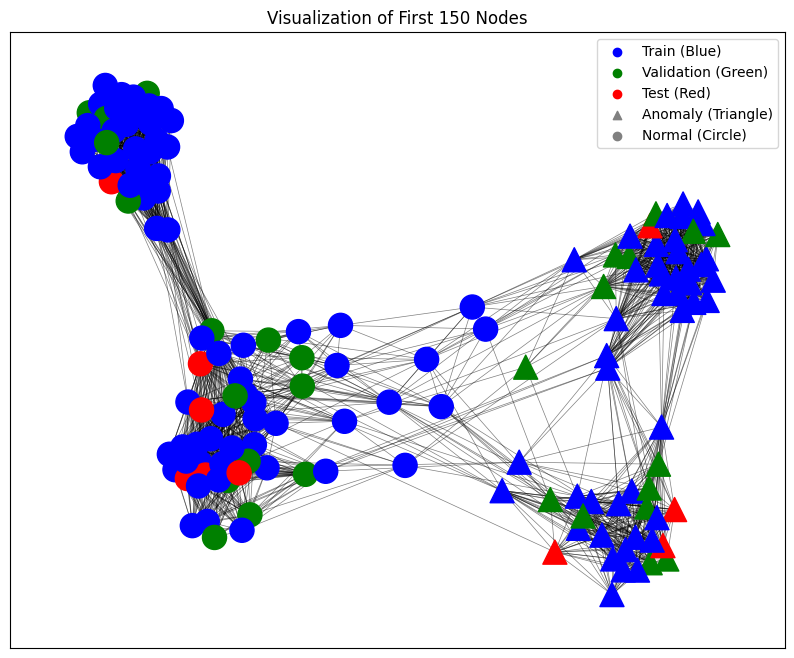

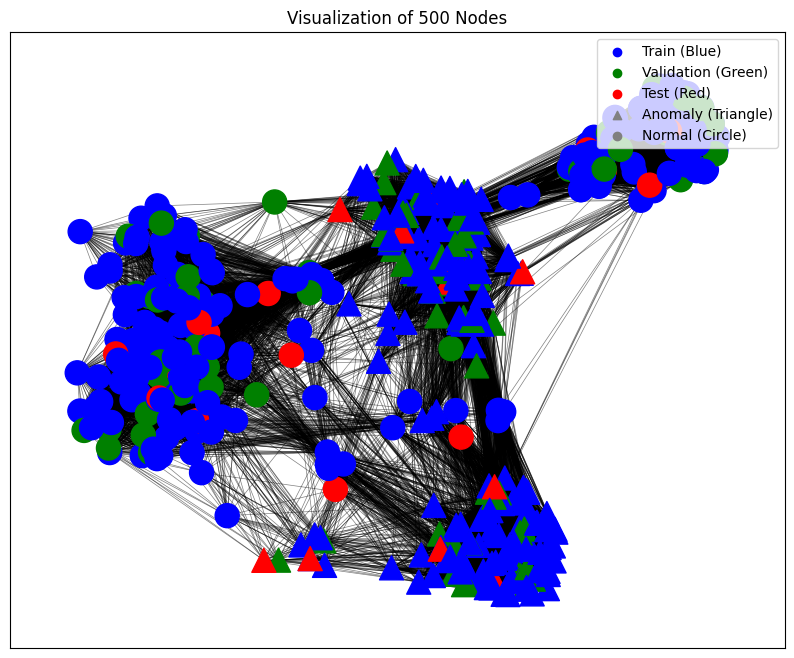

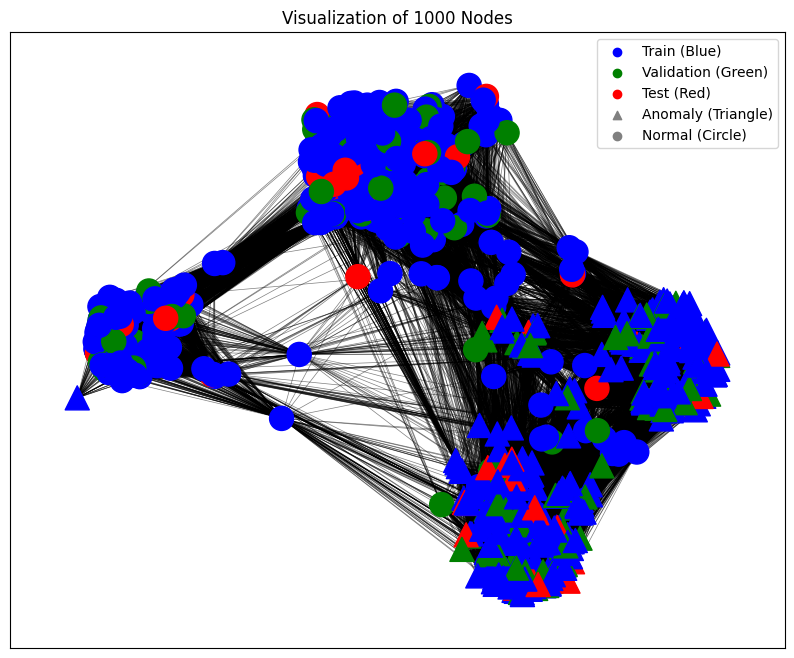

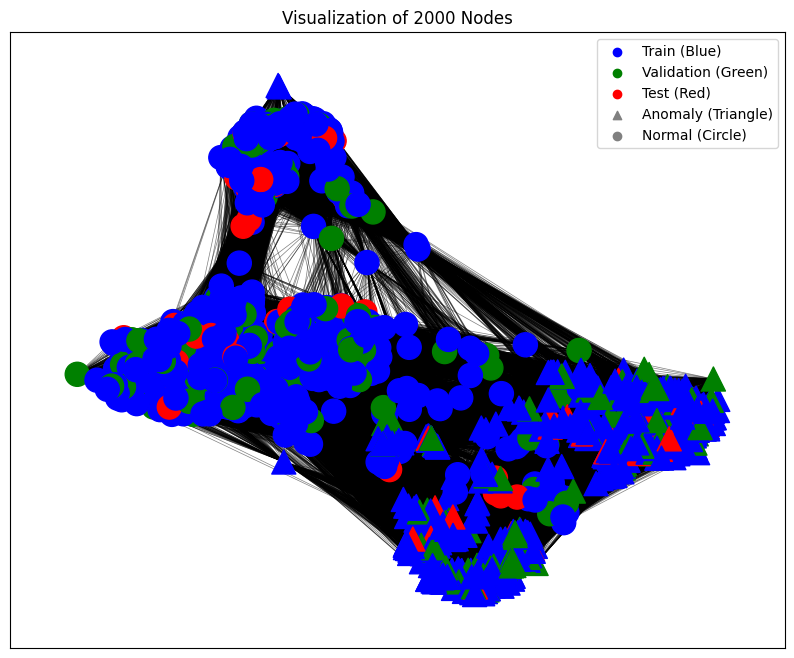

In [46]:
#  visualiztion of train test and validation nodes

import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph(graph_data, num_nodes_to_visualize, title):
    subgraph_nodes = list(range(min(num_nodes_to_visualize, graph_data.num_nodes)))
    G = nx.Graph()
    edges = graph_data.edge_index[:, :].numpy()
    G.add_edges_from(edges.T)
    G = G.subgraph(subgraph_nodes)
    node_labels = graph_data.y[:num_nodes_to_visualize].numpy()
    node_colors = []
    node_shapes = []
    for i in subgraph_nodes:
        if graph_data.train_mask[i]:
            color = 'blue'
        elif graph_data.val_mask[i]:
            color = 'green'
        elif graph_data.test_mask[i]:
            color = 'red'
        else:
            color = 'gray'
        node_colors.append(color)
        shape = '^' if node_labels[i] == 1 else 'o'
        node_shapes.append(shape)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    unique_shapes = set(node_shapes)
    for shape in unique_shapes:
        nodes_with_shape = [i for i, s in enumerate(node_shapes) if s == shape]
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=nodes_with_shape,
            node_color=[node_colors[i] for i in nodes_with_shape],
            node_shape=shape,
            node_size=300
        )
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.5)

    legend_labels = [
        "Train (Blue)", "Validation (Green)", "Test (Red)",
        "Anomaly (Triangle)", "Normal (Circle)"
    ]
    for idx, label in enumerate(legend_labels[:3]):
        plt.scatter([], [], c=label.split()[-1][1:-1].lower(), label=label, marker='o')
    for idx, label in enumerate(legend_labels[3:]):
        plt.scatter([], [], c='gray', label=label, marker='^' if "Triangle" in label else 'o')
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()


# Example usage (assuming 'graph_data' is defined)
visualize_graph(graph_data, 50, "Visualization of First 50 Nodes")
visualize_graph(graph_data, 150, "Visualization of First 150 Nodes")
visualize_graph(graph_data, 500, "Visualization of 500 Nodes")
visualize_graph(graph_data, 1000, "Visualization of 1000 Nodes")
visualize_graph(graph_data, 2000, "Visualization of 2000 Nodes")


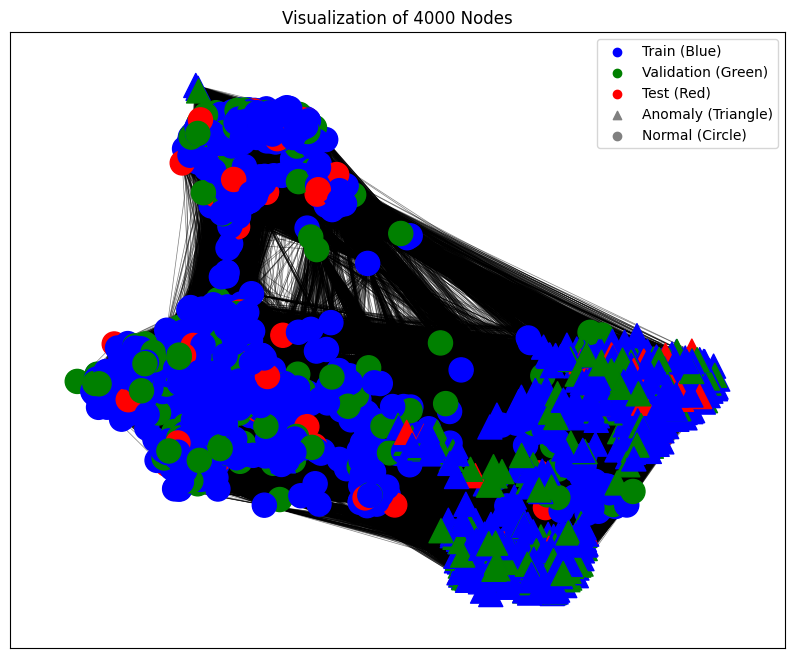

In [47]:
visualize_graph(graph_data, 4000, "Visualization of 4000 Nodes")

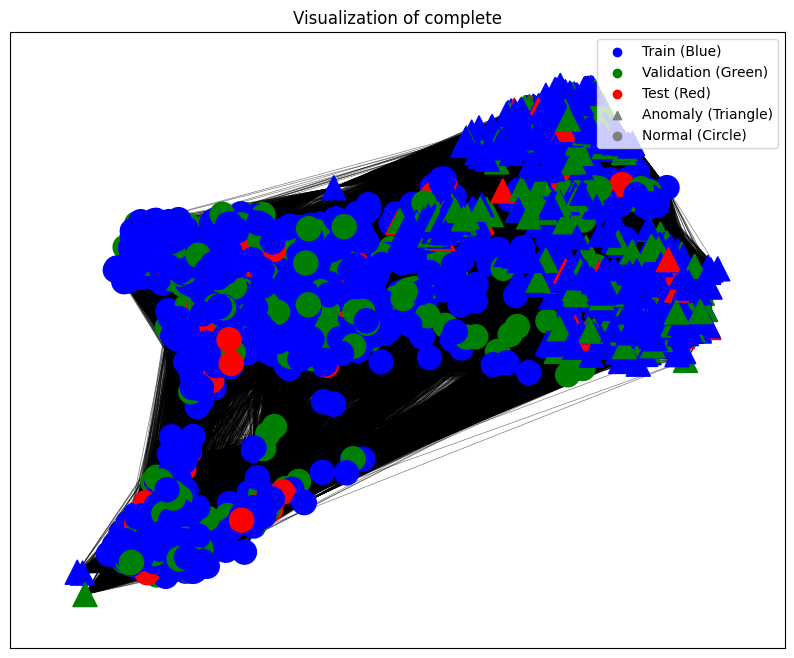

In [48]:
visualize_graph(graph_data, 6000, "Visualization of complete")

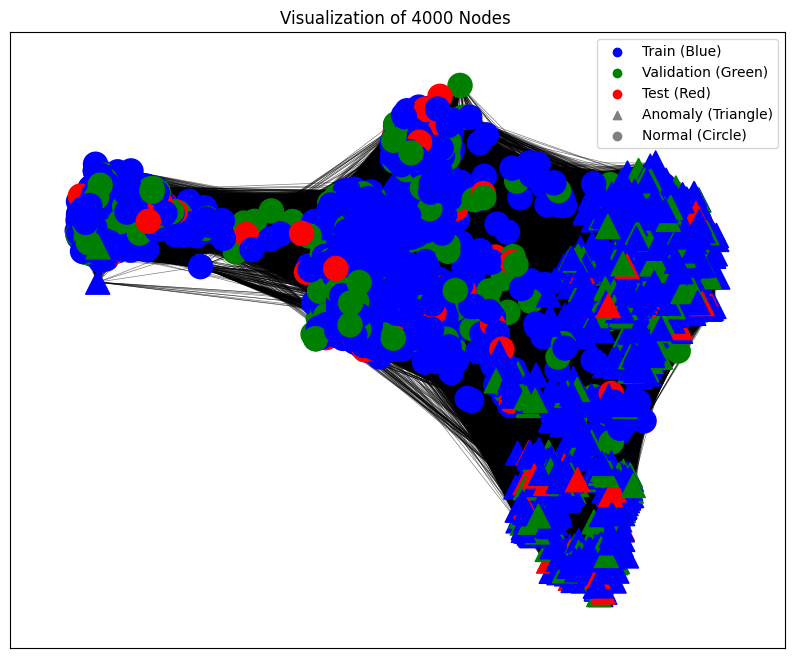

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Step 1: Extract the first 50 nodes
num_nodes_to_visualize = 4000
subgraph_nodes = list(range(min(num_nodes_to_visualize, graph_data.num_nodes)))

# Step 2: Create a NetworkX graph from edge_index
G = nx.Graph()
edges = graph_data.edge_index[:, :].numpy()
G.add_edges_from(edges.T)

# Filter the graph to include only the subgraph nodes
G = G.subgraph(subgraph_nodes)

# Step 3: Prepare node attributes
node_labels = graph_data.y[:num_nodes_to_visualize].numpy()  # Anomaly labels
node_colors = []  # Colors for nodes
node_shapes = []  # Shapes for nodes

# Assign colors and shapes based on train/val/test and anomaly status
for i in subgraph_nodes:
    if graph_data.train_mask[i]:
        color = 'blue'  # Train
    elif graph_data.val_mask[i]:
        color = 'green'  # Validation
    elif graph_data.test_mask[i]:
        color = 'red'  # Test
    else:
        color = 'gray'  # Default (shouldn't happen if masks are set correctly)

    node_colors.append(color)

    # Shape: Triangle for anomaly, circle for normal
    shape = '^' if node_labels[i] == 1 else 'o'
    node_shapes.append(shape)

# Step 4: Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for node positions

# Draw nodes and edges
unique_shapes = set(node_shapes)
for shape in unique_shapes:
    nodes_with_shape = [i for i, s in enumerate(node_shapes) if s == shape]
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes_with_shape,
        node_color=[node_colors[i] for i in nodes_with_shape],
        node_shape=shape,
        node_size=300
    )

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.5)

# Add legend
legend_labels = [
    "Train (Blue)", "Validation (Green)", "Test (Red)",
    "Anomaly (Triangle)", "Normal (Circle)"
]
for idx, label in enumerate(legend_labels[:3]):  # Colors
    plt.scatter([], [], c=legend_labels[idx].split()[-1][1:-1].lower(), label=label, marker='o')
for idx, label in enumerate(legend_labels[3:]):  # Shapes
    plt.scatter([], [], c='gray', label=label, marker='^' if "Triangle" in label else 'o')
plt.legend(loc='upper right')

plt.title("Visualization of 4000 Nodes ")
plt.show()


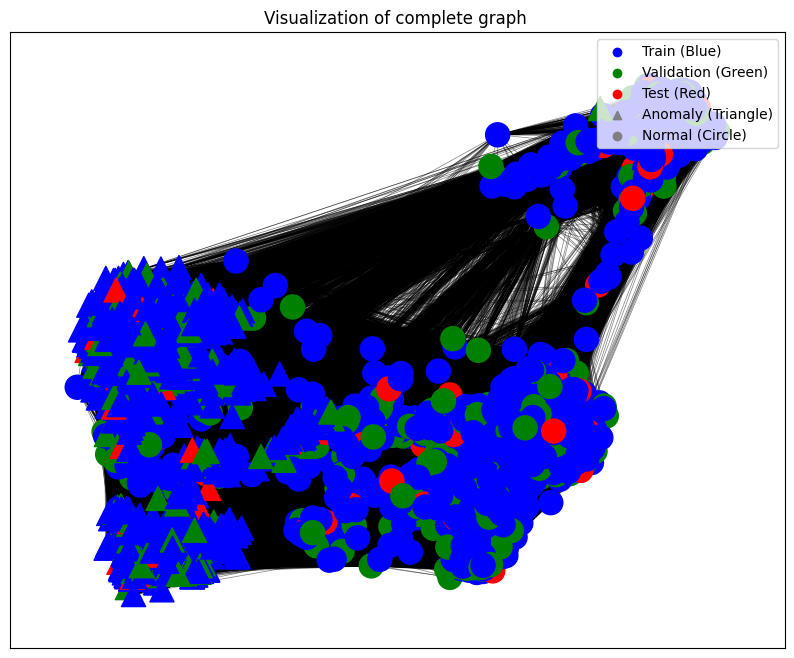

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Step 1: Extract the first 50 nodes
num_nodes_to_visualize = 6000
subgraph_nodes = list(range(min(num_nodes_to_visualize, graph_data.num_nodes)))

# Step 2: Create a NetworkX graph from edge_index
G = nx.Graph()
edges = graph_data.edge_index[:, :].numpy()
G.add_edges_from(edges.T)

# Filter the graph to include only the subgraph nodes
G = G.subgraph(subgraph_nodes)

# Step 3: Prepare node attributes
node_labels = graph_data.y[:num_nodes_to_visualize].numpy()  # Anomaly labels
node_colors = []  # Colors for nodes
node_shapes = []  # Shapes for nodes

# Assign colors and shapes based on train/val/test and anomaly status
for i in subgraph_nodes:
    if graph_data.train_mask[i]:
        color = 'blue'  # Train
    elif graph_data.val_mask[i]:
        color = 'green'  # Validation
    elif graph_data.test_mask[i]:
        color = 'red'  # Test
    else:
        color = 'gray'  # Default (shouldn't happen if masks are set correctly)

    node_colors.append(color)

    # Shape: Triangle for anomaly, circle for normal
    shape = '^' if node_labels[i] == 1 else 'o'
    node_shapes.append(shape)

# Step 4: Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for node positions

# Draw nodes and edges
unique_shapes = set(node_shapes)
for shape in unique_shapes:
    nodes_with_shape = [i for i, s in enumerate(node_shapes) if s == shape]
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes_with_shape,
        node_color=[node_colors[i] for i in nodes_with_shape],
        node_shape=shape,
        node_size=300
    )

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.5)

# Add legend
legend_labels = [
    "Train (Blue)", "Validation (Green)", "Test (Red)",
    "Anomaly (Triangle)", "Normal (Circle)"
]
for idx, label in enumerate(legend_labels[:3]):  # Colors
    plt.scatter([], [], c=legend_labels[idx].split()[-1][1:-1].lower(), label=label, marker='o')
for idx, label in enumerate(legend_labels[3:]):  # Shapes
    plt.scatter([], [], c='gray', label=label, marker='^' if "Triangle" in label else 'o')
plt.legend(loc='upper right')

plt.title("Visualization of complete graph ")
plt.show()
